/Users/arthurostrauss/anaconda3/envs/rl_qoc_v1/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


{'optimization_level': 3, 'resilience_level': None, 'max_execution_time': None, 'execution': {'init_qubits': True, 'rep_delay': None}, 'resilience': {'measure_mitigation': None, 'measure_noise_learning': {'num_randomizations': None, 'shots_per_randomization': None}, 'zne_mitigation': False, 'zne': {'noise_factors': None, 'extrapolator': None}, 'pec_mitigation': False, 'pec': {'max_overhead': None, 'noise_gain': None}, 'layer_noise_learning': {'max_layers_to_learn': None, 'shots_per_randomization': None, 'num_randomizations': None, 'layer_pair_depths': None}}, 'environment': {'log_level': 'WARNING', 'job_tags': None}, 'simulator': {'seed_simulator': 100, 'coupling_map': None, 'basis_gates': None}}
Circuit context


/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/q_env_config.py:105: UserWarning: No backend was provided, State vector simulation will be used
  warnings.warn("No backend was provided, State vector simulation will be used")


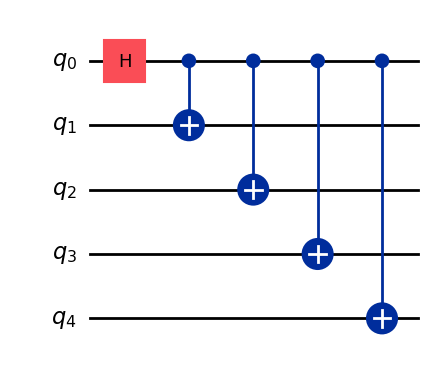

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from template_configurations.qiskit.gate_level import (
    q_env_config as gate_q_env_config,
    circuit_context,
)
from quantumenvironment import QuantumEnvironment
from context_aware_quantum_environment import ContextAwareQuantumEnvironment
from gymnasium.wrappers import RescaleAction, ClipAction

circuit_context.draw("mpl")

In [2]:
from qiskit.visualization import plot_gate_map, plot_circuit_layout

if (
        gate_q_env_config.backend_config.backend is not None
        and circuit_context.layout is not None
):
    plot_circuit_layout(
        circuit_context, gate_q_env_config.backend_config.backend, view="physical"
    )

In [3]:
use_context = True
if use_context:
    q_env = ContextAwareQuantumEnvironment(
        gate_q_env_config, circuit_context, training_steps_per_gate=250
    )
else:
    q_env = QuantumEnvironment(gate_q_env_config)
rescaled_env = RescaleAction(ClipAction(q_env), -1.0, 1.0)

/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/helper_functions.py:1763: UserWarning: No Backend was provided, using default values for dt, coupling_map, basis_gates and instruction_durations
  warnings.warn(


Sending Estimator job...
SparsePauliOp(['II', 'IY', 'XI', 'XY'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])
Finished Estimator job


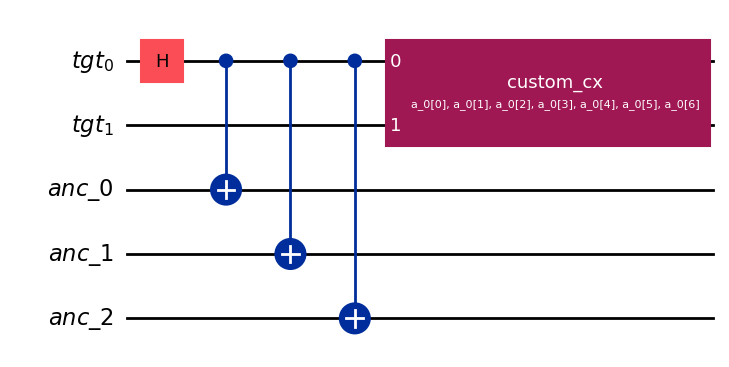

In [4]:
q_env.circuit_truncations[0].draw("mpl", style="iqp")

In [5]:
pub = q_env.retrieve_observables_and_input_states(q_env.circuit_truncations[0])

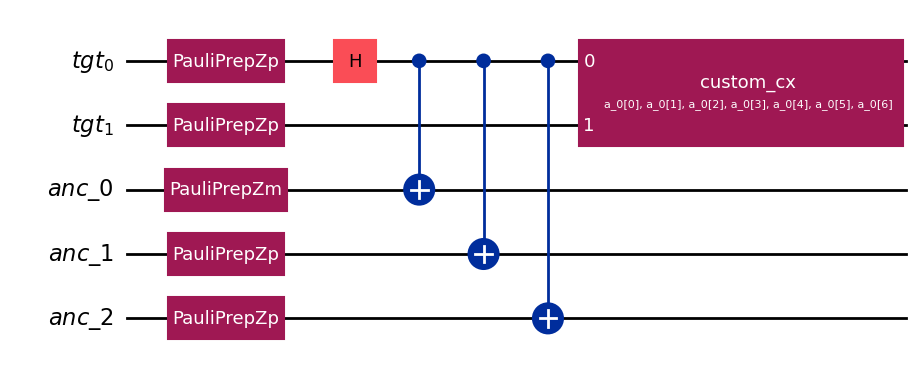

In [6]:
pub[4][0].draw("mpl")

In [7]:
q_env._chi_gate[21]

1.0

In [8]:
import numpy as np

np.unravel_index(21, (16, 16))

(1, 5)

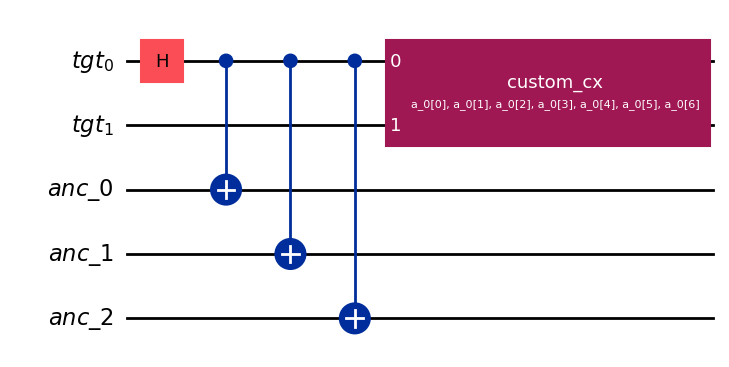

In [9]:
from qiskit import transpile

circuit = transpile(q_env.circuit_truncations[0], q_env.backend, optimization_level=1)
circuit.draw("mpl")

In [10]:
if use_context:
    q_env.circuit_context.draw("mpl")

In [11]:
from qiskit.visualization import plot_gate_map

if q_env.backend is not None and q_env.backend_info.coupling_map.size() != 0:
    plot_gate_map(q_env.backend)

In [12]:
import yaml

with open(
        "/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/template_configurations/agent_config.yaml",
        "r",
) as f:
    agent_config = yaml.safe_load(f)

In [13]:
from ppo import CustomPPO

ppo_agent = CustomPPO(agent_config, rescaled_env)

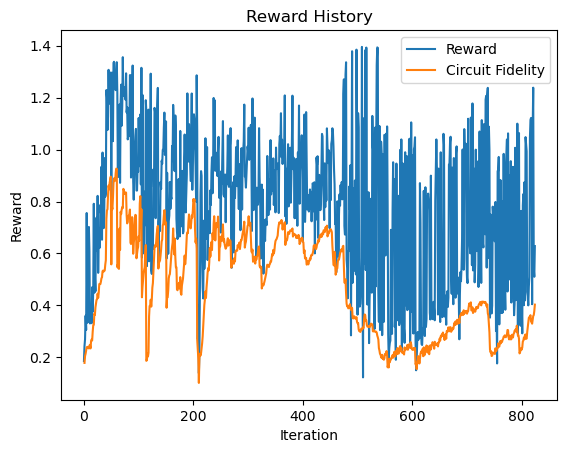

 65%|██████▌   | 325/500 [06:48<03:28,  1.19s/it]

Starting benchmarking...
Fidelity stored 0.4107835048906959
Finished benchmarking
Sending Estimator job...
SparsePauliOp(['IIIII', 'IIIXI', 'IIXII', 'IIXXI', 'IZIIZ', 'IZIXZ', 'IZXIZ', 'IZXXZ', 'XXIIY', 'XXIXY', 'XXXIY', 'XXXXY', 'XYIIX', 'XYIXX', 'YXIIX', 'YXXIX', 'YXXXX', 'YYIIY', 'YYIXY', 'YYXIY', 'YYXXY', 'ZIXIZ', 'ZIXXZ', 'ZZIII', 'ZZIXI', 'ZZXII', 'ZZXXI'],
              coeffs=[ 1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,
  1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,
 -1.41421356+0.j, -1.41421356+0.j, -1.41421356+0.j, -1.41421356+0.j,
 -1.41421356+0.j, -1.41421356+0.j, -1.41421356+0.j, -1.41421356+0.j,
 -1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,
  1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,
  1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j])


 65%|██████▌   | 325/500 [06:50<03:40,  1.26s/it]

Finished Estimator job
Time taken 0.40708303451538086


ValueError: Expected parameter loc (Tensor of shape (32, 7)) of distribution Normal(loc: torch.Size([32, 7]), scale: torch.Size([32, 7])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan]], grad_fn=<TanhBackward0>)

In [23]:
ppo_agent.train(total_updates=500, print_debug=False, num_prints=1, clear_history=False)

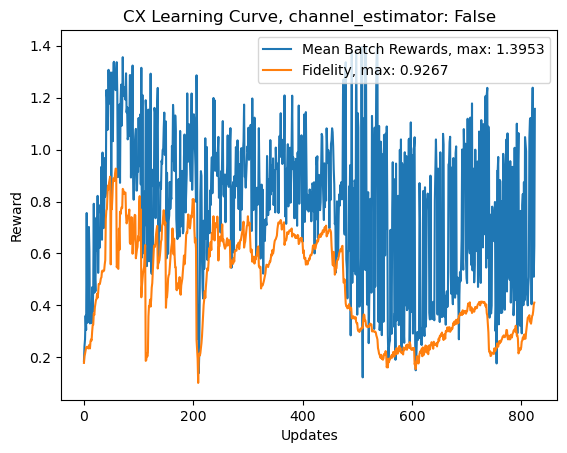

In [24]:
import numpy as np
import matplotlib.pyplot as plt

reward_history = np.array(q_env.reward_history)
mean_rewards = np.mean(reward_history, axis=-1)
max_mean = int(np.max(mean_rewards) * 1e4) / 1e4

plt.plot(mean_rewards, label=f"Mean Batch Rewards, max: {max_mean}")
plt.plot(
    q_env.fidelity_history,
    label=f"Fidelity, max: {int(np.max(q_env.fidelity_history) * 1e4) / 1e4}",
)
plt.xlabel("Updates")
plt.ylabel("Reward")
plt.title(
    f"{q_env.target['gate'].name.upper()} Learning Curve, channel_estimator: {q_env.channel_estimator}"
)
plt.legend()
plt.show()

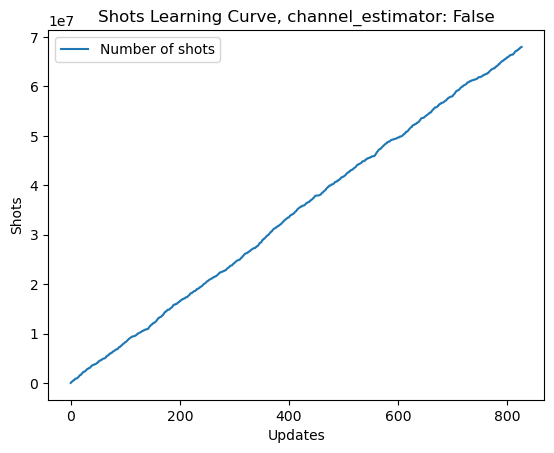

In [25]:
plt.plot(np.cumsum(q_env.total_shots), label="Number of shots")
plt.xlabel("Updates")
plt.ylabel("Shots")
plt.title(f"Shots Learning Curve, channel_estimator: {q_env.channel_estimator}")
plt.legend()

In [17]:
q_env.reward_history[49]

array([1.31574997, 1.38082623, 1.32129415, 1.31552207, 1.0614245 ,
       1.32119656, 1.39950774, 1.40288569, 1.34745737, 1.38750793,
       1.33839296, 1.33989095, 1.35267925, 1.0115323 , 1.35895602,
       1.17474629, 1.14968879, 1.29655133, 1.40419744, 1.25213787,
       1.33124725, 1.21809998, 1.38391355, 1.29859487, 1.19935587,
       1.28444961, 1.34752724, 1.23036944, 1.29707674, 1.31575314,
       1.32975374, 1.26071099, 1.26640006, 1.32965241, 1.25434151,
       1.24244942, 1.34792035, 1.35770279, 1.06815546, 1.31864435,
       1.33064009, 1.39235114, 1.38175286, 1.25578652, 1.2561056 ,
       1.16433304, 1.38039953, 1.39888332, 1.3293577 , 1.38664673,
       1.2460316 , 1.38882472, 1.37457352, 1.34887341, 1.16436869,
       1.36750493, 1.27094278, 1.30256604, 1.26480184, 1.21319972,
       1.33366736, 1.24376704, 1.30842544, 1.29950607, 1.22821648,
       1.34813042, 1.20086125, 1.10522859, 1.32252675, 1.36533583,
       1.34137645, 1.07781149, 1.35770763, 1.33873198, 1.38933

In [18]:
q_env.optimal_action

array([ 0.03341712, -2.940346  ,  0.69825328, -3.01594821, -1.24424512,
        3.12163299,  2.74129423])

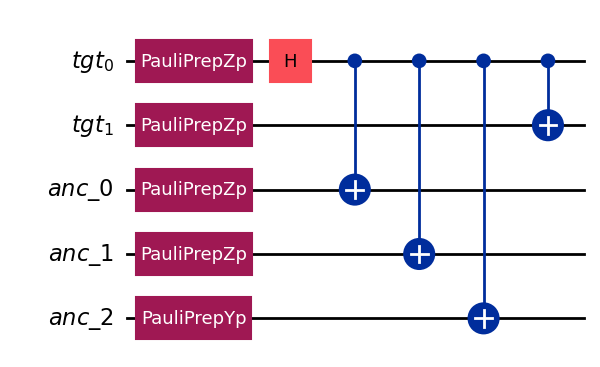

In [19]:
q_env.target["input_states"][0][3]["target_state"]["circuit"].draw("mpl")

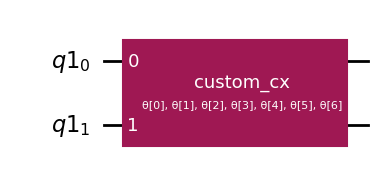

In [20]:
from qiskit.quantum_info import average_gate_fidelity
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import CXGate
from qiskit.circuit import ParameterVector

qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
theta = ParameterVector("θ", 7)
q_env.parametrized_circuit_func(qc, theta, qr, target={"gate": CXGate()})
qc.draw("mpl")

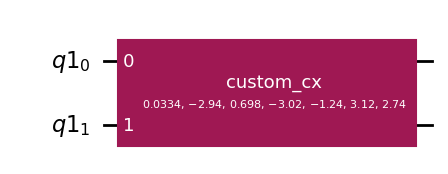

In [21]:
qc.assign_parameters(q_env.optimal_action, inplace=True)
qc.draw("mpl")

In [22]:
from qiskit.quantum_info import Operator

average_gate_fidelity(Operator(qc), q_env.target["gate"])

0.38866814240755376